In [1]:
    import pandas as pd

In [2]:
import numpy as np

# DATA TRANSFORMATION 
## Create startups dataframe, merging additional features from other csv files to organization.csv dataset
- The idea is to create fintech dataframe consisting of fintech companies founded after 1990 year whose employee count, age of ipo, age of acquisition, work experience of employees, funding rounds etc features

## Features date of IPO and date of acquisition 

The first idea is to add features, representing date time of acquisition and ipo (acquired_on, went_public_on), to the organization.csv dataframe. 
The columns acquired_on and went_public on are the components of acquisition.csv and ipos.csv files, respectively.


In [6]:
org = pd.read_csv('organizations.csv')
acq = pd.read_csv('acquisitions.csv')
ipo= pd.read_csv('ipos.csv')

In [7]:
org.shape

(1083102, 41)

In [8]:
acq.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'acquiree_uuid', 'acquiree_name', 'acquiree_cb_url',
       'acquiree_country_code', 'acquiree_state_code', 'acquiree_region',
       'acquiree_city', 'acquirer_uuid', 'acquirer_name', 'acquirer_cb_url',
       'acquirer_country_code', 'acquirer_state_code', 'acquirer_region',
       'acquirer_city', 'acquisition_type', 'acquired_on', 'price_usd',
       'price', 'price_currency_code'],
      dtype='object')

In [9]:
acq['acquired_on'].isnull().sum()

0

In [10]:
acq['acquired_on'].head()

0    2007-05-30
1    2007-07-01
2    2007-05-01
3    2007-05-23
4    2007-07-01
Name: acquired_on, dtype: object

In [11]:
acq_year = acq[['acquiree_uuid', 'acquired_on']]

In [12]:
startups= pd.merge(org, acq_year, left_on='uuid', right_on='acquiree_uuid', how='left')

In [13]:
startups.head(5)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits,acquiree_uuid,acquired_on
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,172707.0,2007-05-25 13:51:27,2023-08-01 00:01:37,NaN,company,...,https://www.linkedin.com/company/recruitment-c...,https://twitter.com/wetpainttv,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,e1393508-30ea-8a36-3f96-dd3226033abd,2013-12-16
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,166666.0,2007-05-26 02:30:28,2023-10-19 07:46:32,Zoho Corporation Pvt. Ltd.,"investor,company",...,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,2.0,NaN,NaN
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,25609.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,2012-07-12
3,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,25609.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,2018-04-25
4,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,27542.0,2007-05-26 03:21:34,2023-08-30 02:27:06,NaN,"investor,company",...,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,investor,62.0,NaN,NaN


In [14]:
startups.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url',
       'country_code', 'state_code', 'region', 'city', 'address',
       'postal_code', 'status', 'short_description', 'category_list',
       'category_groups_list', 'num_funding_rounds', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code', 'founded_on',
       'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone',
       'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1',
       'alias2', 'alias3', 'primary_role', 'num_exits', 'acquiree_uuid',
       'acquired_on'],
      dtype='object')

In [15]:
ipo.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'org_uuid', 'org_name', 'org_cb_url', 'country_code',
       'state_code', 'region', 'city', 'stock_exchange_symbol', 'stock_symbol',
       'went_public_on', 'share_price_usd', 'share_price',
       'share_price_currency_code', 'valuation_price_usd', 'valuation_price',
       'valuation_price_currency_code', 'money_raised_usd', 'money_raised',
       'money_raised_currency_code'],
      dtype='object')

In [16]:
ipos= ipo[['org_uuid', 'went_public_on']]

In [17]:
startups=pd.merge(startups, ipos, left_on='uuid', right_on='org_uuid', how='left')

In [18]:
startups.head(10)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,logo_url,alias1,alias2,alias3,primary_role,num_exits,acquiree_uuid,acquired_on,org_uuid,went_public_on
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,172707.0,2007-05-25 13:51:27,2023-08-01 00:01:37,NaN,company,...,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,e1393508-30ea-8a36-3f96-dd3226033abd,2013-12-16,NaN,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,166666.0,2007-05-26 02:30:28,2023-10-19 07:46:32,Zoho Corporation Pvt. Ltd.,"investor,company",...,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,2.0,NaN,NaN,NaN,NaN
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,25609.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,2012-07-12,NaN,NaN
3,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,25609.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,2018-04-25,NaN,NaN
4,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,27542.0,2007-05-26 03:21:34,2023-08-30 02:27:06,NaN,"investor,company",...,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,investor,62.0,NaN,NaN,NaN,NaN
5,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,38.0,2007-05-26 04:22:15,2023-11-27 12:05:27,"Meta Platforms, Inc.","investor,company",...,https://images.crunchbase.com/image/upload/t_c...,Facebook,"Facebook, Inc.",FB,company,1.0,NaN,NaN,df662812-7f97-0b43-9d3e-12f64f504fbb,2012-05-18
6,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,organization,trinity-ventures,https://www.crunchbase.com/organization/trinit...,49715.0,2007-05-26 20:13:00,2023-08-30 23:04:05,NaN,"investor,company",...,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,investor,144.0,NaN,NaN,NaN,NaN
7,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,accel,https://www.crunchbase.com/organization/accel,7130.0,2007-05-26 20:27:39,2023-12-27 00:09:11,Accel Partners LP,"investor,company",...,https://images.crunchbase.com/image/upload/t_c...,Accel Partners,NaN,NaN,investor,369.0,NaN,NaN,NaN,NaN
8,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,organization,meritech-capital-partners,https://www.crunchbase.com/organization/merite...,49817.0,2007-05-26 20:29:59,2023-08-30 02:30:19,NaN,"investor,company",...,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,investor,130.0,NaN,NaN,NaN,NaN
9,60485007-8856-bbac-aa1b-c535c41f5f47,Omnidrive,organization,omnidrive,https://www.crunchbase.com/organization/omnidrive,1086739.0,2007-05-27 10:25:32,2019-10-03 06:30:53,NaN,company,...,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,NaN,NaN,NaN,NaN


## Feature funding stages 
1) Filtering only funding stages (from preseed to stage j) of investment_type column
2) Adding investment_type feature to startup dataset

In [20]:
frounds = pd.read_csv('funding_rounds.csv')

In [21]:
frounds.head(10)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,...,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,240759.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,...,500000.0,500000.0,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7
1,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/faceb...,254108.0,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,CA,...,12700000.0,12700000.0,USD,98000000.0,98000000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36
2,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,funding_round,facebook-series-b--6fae3958,https://www.crunchbase.com/funding_round/faceb...,413893.0,2007-05-27 06:09:36,2018-02-12 23:30:46,USA,CA,...,27500000.0,27500000.0,USD,502500000.0,502500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
3,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,funding_round,photobucket-series-b--bcd5a63d,https://www.crunchbase.com/funding_round/photo...,321661.0,2007-05-29 11:05:59,2018-02-12 23:27:36,USA,CO,...,10500000.0,10500000.0,USD,NaN,NaN,NaN,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN
4,60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,funding_round,geni-series-a--60e6afd9,https://www.crunchbase.com/funding_round/geni-...,126498.0,2007-05-31 20:19:28,2018-02-12 23:41:29,USA,CA,...,NaN,NaN,NaN,10000000.0,10000000.0,USD,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c
5,4a56483e-d637-65fa-a2b4-abe6613e5c6b,Series B - Geni,funding_round,geni-series-b--4a56483e,https://www.crunchbase.com/funding_round/geni-...,364779.0,2007-05-31 20:35:03,2018-02-12 23:55:19,USA,CA,...,10000000.0,10000000.0,USD,100000000.0,100000000.0,USD,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,1787528e-7bd3-a500-ba86-ac55205e7e21
6,7066cfde-674a-0fc4-514c-bf3c9b0d7b2e,Seed Round - StumbleUpon,funding_round,stumbleupon-seed--7066cfde,https://www.crunchbase.com/funding_round/stumb...,337540.0,2007-06-01 19:14:34,2018-02-12 23:57:22,USA,CA,...,1500000.0,1500000.0,USD,NaN,NaN,NaN,4.0,3d16cb4c-911e-75c0-de5a-15c316b39f98,StumbleUpon,NaN
7,0c000adf-4d17-3ebe-bbfc-74d7e691f9e8,Series A - Gizmoz,funding_round,gizmoz-series-a--0c000adf,https://www.crunchbase.com/funding_round/gizmo...,600275.0,2007-06-01 20:09:47,2018-02-12 23:57:58,USA,NY,...,6300000.0,6300000.0,USD,NaN,NaN,NaN,3.0,56b5f0c1-855f-2ebb-083f-16641f1db2e1,Gizmoz,4a4f6a1a-40ec-50f9-a928-8f7087e973c3
8,e5b9d3d3-cdf5-b481-c42f-bb818225402c,Seed Round - Scribd,funding_round,scribd-seed--e5b9d3d3,https://www.crunchbase.com/funding_round/scrib...,286195.0,2007-06-02 07:36:21,2019-12-11 07:25:55,USA,CA,...,40000.0,40000.0,USD,NaN,NaN,NaN,2.0,21e77067-5537-408e-cad7-e5e72bb6ad86,Scribd,NaN
9,7a65fabf-64bb-51b4-7e8a-bb20a33aa38f,Series A - Scribd,funding_round,scribd-series-a--7a65fabf,https://www.crunchbase.com/funding_round/scrib...,230492.0,2007-06-02 07:49:08,2018-02-12 23:57:21,USA,CA,...,3710000.0,3710000.0,USD,21210000.0,21210000.0,USD,6.0,21e77067-5537-408e-cad7-e5e72bb6ad86,Scribd,NaN


In [22]:
frounds.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'country_code', 'state_code', 'region', 'city',
       'investment_type', 'announced_on', 'raised_amount_usd', 'raised_amount',
       'raised_amount_currency_code', 'post_money_valuation_usd',
       'post_money_valuation', 'post_money_valuation_currency_code',
       'investor_count', 'org_uuid', 'org_name', 'lead_investor_uuids'],
      dtype='object')

In [23]:
frounds['investment_type'].unique()

array(['angel', 'series_a', 'series_b', 'seed', 'series_c', 'series_d',
       'series_unknown', 'debt_financing', 'series_e', 'private_equity',
       'series_f', 'pre_seed', 'undisclosed', 'grant', 'post_ipo_equity',
       'convertible_note', 'post_ipo_debt', 'non_equity_assistance',
       'corporate_round', 'series_i', 'series_g', 'secondary_market',
       'post_ipo_secondary', 'initial_coin_offering', 'series_h',
       'product_crowdfunding', 'equity_crowdfunding', 'series_j'],
      dtype=object)

In [24]:
drop_inv_type= ['series_unknown', 'debt_financing', 'private_equity', 'undisclosed', 'grant', 'post_ipo_equity',
       'convertible_note', 'post_ipo_debt', 'non_equity_assistance', 'corporate_round','secondary_market',
       'post_ipo_secondary', 'initial_coin_offering', 'product_crowdfunding', 'equity_crowdfunding' ]

In [25]:
frounds = frounds[~frounds['investment_type'].isin(drop_inv_type)]

In [26]:
frounds['investment_type'].unique()

array(['angel', 'series_a', 'series_b', 'seed', 'series_c', 'series_d',
       'series_e', 'series_f', 'pre_seed', 'series_i', 'series_g',
       'series_h', 'series_j'], dtype=object)

2) 

In [28]:
inv_type = frounds[['investment_type','investor_count', 'org_uuid']]


In [29]:
startups = pd.merge(startups, inv_type, left_on = 'uuid', right_on='org_uuid', how= 'left')

In [30]:
startups.head(5)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,alias3,primary_role,num_exits,acquiree_uuid,acquired_on,org_uuid_x,went_public_on,investment_type,investor_count,org_uuid_y
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,172707.0,2007-05-25 13:51:27,2023-08-01 00:01:37,NaN,company,...,NaN,company,NaN,e1393508-30ea-8a36-3f96-dd3226033abd,2013-12-16,NaN,NaN,series_a,2.0,e1393508-30ea-8a36-3f96-dd3226033abd
1,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,172707.0,2007-05-25 13:51:27,2023-08-01 00:01:37,NaN,company,...,NaN,company,NaN,e1393508-30ea-8a36-3f96-dd3226033abd,2013-12-16,NaN,NaN,series_b,3.0,e1393508-30ea-8a36-3f96-dd3226033abd
2,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,172707.0,2007-05-25 13:51:27,2023-08-01 00:01:37,NaN,company,...,NaN,company,NaN,e1393508-30ea-8a36-3f96-dd3226033abd,2013-12-16,NaN,NaN,series_c,4.0,e1393508-30ea-8a36-3f96-dd3226033abd
3,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,166666.0,2007-05-26 02:30:28,2023-10-19 07:46:32,Zoho Corporation Pvt. Ltd.,"investor,company",...,NaN,company,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,25609.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,NaN,company,NaN,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,2012-07-12,NaN,NaN,series_b,3.0,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0


## Feature previous work experience

We extract graduation year from people.csv file to create new variable that shows how many years passed between CEO's graduation and startup foundation. 
First, we merge degree's column [completed_on] with people.csv , based on unique identifier 'uuid', and filter to only CEO people.

In [33]:
#degrees = pd.read_csv('degrees.csv')

In [34]:
#degrees.columns

In [35]:
#people= pd.read_csv('people.csv')

In [36]:
#degrees1= degrees[['uuid', 'completed_on']]
#people1 =people['uuid']

In [37]:
#people = pd.merge(people1, degrees1, on= 'uuid', how='left')

In [38]:
#people.head(3)

In [39]:
#people['graduation_year'] = pd.to_datetime(people['completed_on']).dt.year


In [40]:
#people1=people[['uuid', 'graduation_year']]


## Feature work experience 

1) First, we extract information about work experience, based on jobs.csv table, more precisely, started_on and ended_on columns. Work experience is represented as difference between year when person quits the job and year when he or she starts.
- In case, if it is about of still active employee/executive, whose record about year when he started to work in startup exists in dataset, we calculate his experience as he quit in 2024.

In [42]:
jobs = pd.read_csv('jobs.csv')

/tmp/ipykernel_1597/1289950620.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  jobs = pd.read_csv('jobs.csv')


In [43]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662093 entries, 0 to 662092
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   uuid         662093 non-null  object 
 1   name         662054 non-null  object 
 2   type         662093 non-null  object 
 3   permalink    662043 non-null  object 
 4   cb_url       662043 non-null  object 
 5   rank         0 non-null       float64
 6   created_at   662093 non-null  object 
 7   updated_at   662093 non-null  object 
 8   person_uuid  662060 non-null  object 
 9   person_name  662060 non-null  object 
 10  org_uuid     662087 non-null  object 
 11  org_name     662086 non-null  object 
 12  started_on   368388 non-null  object 
 13  ended_on     233312 non-null  object 
 14  is_current   662092 non-null  object 
 15  title        662029 non-null  object 
 16  job_type     662092 non-null  object 
dtypes: float64(1), object(16)
memory usage: 85.9+ MB


In [44]:
jobs.head(10)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,org_uuid,org_name,started_on,ended_on,is_current,title,job_type
0,697b6934-fc1f-9d63-cfb2-1a10759b378e,Ben Elowitz Co-Founder and CEO @ Wetpaint,job,ben-elowitz-executive-wetpaint--697b6934,https://www.crunchbase.com/job/ben-elowitz-exe...,NaN,2007-05-25 07:03:54,2021-03-25 03:59:21,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,2005-10-01,2014-06-01,False,Co-Founder and CEO,executive
1,b1de3765-442e-b556-9304-551c2a055901,Kevin Flaherty VP Marketing @ Wetpaint,job,kevin-flaherty-executive-wetpaint--b1de3765,https://www.crunchbase.com/job/kevin-flaherty-...,NaN,2007-05-25 07:04:16,2018-02-13 01:32:51,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,NaN,False,VP Marketing,executive
2,1319cd30-f5e8-c700-0af6-64029c6f7124,Raju Vegesna Chief Evangelist @ Zoho,job,raju-vegesna-employee-zoho--1319cd30,https://www.crunchbase.com/job/raju-vegesna-em...,NaN,2007-05-25 19:33:03,2018-02-13 01:19:53,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2000-11-01,NaN,True,Chief Evangelist,employee
3,27a252de-1ea8-c620-b2d4-5b889fa9b40f,Ian Wenig VP Business Development @ Zoho,job,ian-wenig-executive-zoho--27a252de,https://www.crunchbase.com/job/ian-wenig-execu...,NaN,2007-05-25 19:34:53,2018-02-13 01:21:35,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2006-03-01,NaN,True,VP Business Development,executive
4,5a802a79-229f-44ae-0aba-db330f10b67a,Jay Adelson CEO @ Digg,job,jay-adelson-executive-digg--5a802a79,https://www.crunchbase.com/job/jay-adelson-exe...,NaN,2007-05-25 20:05:33,2018-02-13 01:25:38,c92a1f00-8c19-bf2e-0f28-dbbd383dc968,Jay Adelson,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,2005-07-01,2010-04-05,False,CEO,executive
5,423205d5-feb5-06e3-8bb0-67fe5c3ddf7a,Owen Byrne Senior Software Engineer @ Digg,job,owen-byrne-employee-digg--423205d5,https://www.crunchbase.com/job/owen-byrne-empl...,NaN,2007-05-25 20:06:45,2018-02-13 01:23:43,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,NaN,NaN,False,Senior Software Engineer,employee
6,55aa1e54-d21e-1697-9892-c07ef2fa8b10,Ron Gorodetzky Systems Engineering Manager @ Digg,job,ron-gorodetzky-executive-digg--55aa1e54,https://www.crunchbase.com/job/ron-gorodetzky-...,NaN,2007-05-25 20:07:50,2018-02-13 01:25:17,80d25c23-9726-9dda-5852-39cdf4810ea5,Ron Gorodetzky,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,NaN,NaN,False,Systems Engineering Manager,executive
7,befc22de-c789-2096-e4d6-919935cf4204,"Mark Zuckerberg Founder, Chairman and Chief Ex...",job,mark-zuckerberg-executive-facebook--befc22de,https://www.crunchbase.com/job/mark-zuckerberg...,NaN,2007-05-25 21:51:46,2022-07-07 02:31:25,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,2004-01-01,NaN,True,"Founder, Chairman and Chief Executive Officer",executive
8,9ef8b964-186e-55e9-5faa-fb1d60034f6e,Dustin Moskovitz Co-Founder @ Meta,job,dustin-moskovitz-executive-facebook--9ef8b964,https://www.crunchbase.com/job/dustin-moskovit...,NaN,2007-05-25 22:15:05,2018-02-13 01:31:12,084aaa07-0795-1fe8-9c46-98bbeb02cd64,Dustin Moskovitz,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,2004-02-01,2008-11-01,False,Co-Founder,executive
9,72373cf8-eb1f-8b84-93ed-d35edff55c5f,Owen Van Natta COO @ Meta,job,owen-van-natta-employee-facebook--72373cf8,https://www.crunchbase.com/job/owen-van-natta-...,NaN,2007-05-25 22:15:59,2018-02-13 01:27:33,d3ae96f0-4442-720f-1ec2-fc28eac94e53,Owen Van Natta,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,NaN,NaN,False,COO,employee


In [45]:
common_values = pd.Series(list(set(startups['uuid']) & set(jobs['org_uuid'])))


In [46]:
len(common_values)

186930

In [47]:
jobs['year_started_work'] = jobs['started_on'].str.slice(0, 4).astype(float)
jobs['years_ended_on'] = jobs['ended_on'].str.slice(0, 4).astype(float)


In [48]:
#Fills NaN in the years_ended_on column with 2024.0 when year_started_work is not NaN.

jobs.loc[jobs['year_started_work'].notna() & jobs['years_ended_on'].isna(), 'years_ended_on'] = 2024.0


In [49]:
jobs['work_experience'] = jobs['years_ended_on'] - jobs['year_started_work']

In [50]:
jobs['work_experience'].head(5)

0     9.0
1     NaN
2    24.0
3    18.0
4     5.0
Name: work_experience, dtype: float64

In [51]:
jobs['work_experience'].isnull().sum() / jobs['work_experience'].count() * 100

79.72708122957317

2) Merging feature job experience from jobs.csv file to startups datased

In [53]:
jobs1= jobs[['org_uuid', 'work_experience']]


In [54]:
startups = pd.merge(startups, jobs1, left_on='uuid', right_on='org_uuid', how='left')

In [55]:
startups.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url',
       'country_code', 'state_code', 'region', 'city', 'address',
       'postal_code', 'status', 'short_description', 'category_list',
       'category_groups_list', 'num_funding_rounds', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code', 'founded_on',
       'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone',
       'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1',
       'alias2', 'alias3', 'primary_role', 'num_exits', 'acquiree_uuid',
       'acquired_on', 'org_uuid_x', 'went_public_on', 'investment_type',
       'investor_count', 'org_uuid_y', 'org_uuid', 'work_experience'],
      dtype='object')

In [56]:
frounds.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'country_code', 'state_code', 'region', 'city',
       'investment_type', 'announced_on', 'raised_amount_usd', 'raised_amount',
       'raised_amount_currency_code', 'post_money_valuation_usd',
       'post_money_valuation', 'post_money_valuation_currency_code',
       'investor_count', 'org_uuid', 'org_name', 'lead_investor_uuids'],
      dtype='object')

In [57]:
inv = pd.read_csv('investments.csv')

In [58]:
inv.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'funding_round_uuid', 'funding_round_name',
       'investor_uuid', 'investor_name', 'investor_type', 'is_lead_investor'],
      dtype='object')

# DATA SELECTION

## Filter  startups dataset based on FinTech sector criterion 

In [61]:
startups.shape

(2136959, 50)

In [62]:
startups = startups[startups['category_list'].str.contains('FinTech', case=False, na=False)]

In [63]:
startups.shape

(63839, 50)

In [64]:
startups.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url',
       'country_code', 'state_code', 'region', 'city', 'address',
       'postal_code', 'status', 'short_description', 'category_list',
       'category_groups_list', 'num_funding_rounds', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code', 'founded_on',
       'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone',
       'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1',
       'alias2', 'alias3', 'primary_role', 'num_exits', 'acquiree_uuid',
       'acquired_on', 'org_uuid_x', 'went_public_on', 'investment_type',
       'investor_count', 'org_uuid_y', 'org_uuid', 'work_experience'],
      dtype='object')

In [65]:
startups = startups.drop(columns= ['name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url','address',
       'postal_code', 'short_description','total_funding', 'total_funding_currency_code','email', 'phone',
       'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1',
       'alias2', 'alias3', 'primary_role', 'acquiree_uuid', 'org_uuid_x', 'org_uuid_y', 'org_uuid'] )

In [66]:
fintechs = startups

In [67]:
fintechs.columns

Index(['uuid', 'country_code', 'state_code', 'region', 'city', 'status',
       'category_list', 'category_groups_list', 'num_funding_rounds',
       'total_funding_usd', 'founded_on', 'last_funding_on', 'closed_on',
       'employee_count', 'num_exits', 'acquired_on', 'went_public_on',
       'investment_type', 'investor_count', 'work_experience'],
      dtype='object')

## Filter fintech startups founded after 1990

In [69]:
fintechs['founded_on'].head(5)

7680    1996-01-01
7681    1996-01-01
7682    1996-01-01
7683    1996-01-01
7684    1996-01-01
Name: founded_on, dtype: object

In [70]:
fintechs['year_founded'] = fintechs['founded_on'].str.slice(0,4).astype(float)

In [71]:
fintechs['year_founded'].head(5)

7680    1996.0
7681    1996.0
7682    1996.0
7683    1996.0
7684    1996.0
Name: year_founded, dtype: float64

In [72]:
fintechs= fintechs[fintechs['year_founded']>1990.0]

In [73]:
fintechs.shape

(58033, 21)

In [74]:
fintechs['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [75]:
fintechs['year_founded'].unique()

array([1996., 1995., 2006., 2005., 2004., 1992., 1998., 2001., 2007.,
       2003., 1993., 1994., 1997., 2018., 2014., 2000., 1999., 2013.,
       2008., 2012., 2009., 2011., 2010., 2021., 2002., 2016., 2019.,
       1991., 2020., 2015., 2017., 2022., 2023.])

# DATA CLEANING

In [77]:
fintechs.columns

Index(['uuid', 'country_code', 'state_code', 'region', 'city', 'status',
       'category_list', 'category_groups_list', 'num_funding_rounds',
       'total_funding_usd', 'founded_on', 'last_funding_on', 'closed_on',
       'employee_count', 'num_exits', 'acquired_on', 'went_public_on',
       'investment_type', 'investor_count', 'work_experience', 'year_founded'],
      dtype='object')

In [78]:
fintechs.shape

(58033, 21)

In [79]:
## Outliers - calculate Q1 (25th percentile) and Q3 (75th percentile)
#Q1 = fintechs_clean['total_funding_usd'].quantile(0.25)
#3 = fintechs_clean['total_funding_usd'].quantile(0.75)
#IQR = Q3 - Q1

In [80]:
# Define outliers as those below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
#lower_bound = Q1 - 1.5*IQR
#upper_bound = Q3 + 1.5*IQR

In [81]:
#fintechs_filter= fintechs_clean[(fintechs_clean['total_funding_usd'] >= lower_bound) & (fintechs_clean['total_funding_usd'] <= upper_bound)]

In [82]:
# Convert objects to numbers

fintechs['total_funding_usd'] = pd.to_numeric(fintechs['total_funding_usd'], errors= 'coerce')

/tmp/ipykernel_1597/3656319065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fintechs['total_funding_usd'] = pd.to_numeric(fintechs['total_funding_usd'], errors= 'coerce')


# Dataset breakdown

In [84]:
fintechs_clean = fintechs.dropna(subset=['total_funding_usd'])

In [85]:
avg_funding_per_cat= fintechs_clean.groupby('category_list')['total_funding_usd'].mean()

In [86]:
avg_funding_per_cat = avg_funding_per_cat.sort_values(ascending = True)

In [87]:
avg_funding_per_cat.head(10)

category_list
Banking,Finance,FinTech,Information Technology,Insurance                                                    0.0
Finance,Financial Exchanges,Financial Services,FinTech,Venture Capital                                      0.0
Banking,Credit Cards,Finance,Financial Services,FinTech,Payments                                            0.0
Finance,Financial Services,FinTech,Funding Platform,Information Technology,Leasing,Lending,SaaS,Software    0.0
Banking,Credit Cards,Finance,Financial Services,FinTech,Internet,Lending,Marketing,Marketing Automation     0.0
Banking,Consumer Lending,Credit,E-Commerce,Financial Services,FinTech,Payments                              0.0
Finance,Financial Services,FinTech,Impact Investing,Internet,Personal Finance,Wealth Management             0.0
Banking,Consumer Lending,Credit Cards,Financial Services,FinTech                                            0.0
Banking,Credit,FinTech,Information Technology,Personal Finance                            

In [88]:
fintechs_clean.head(5)

,uuid,country_code,state_code,region,city,status,category_list,category_groups_list,num_funding_rounds,total_funding_usd,...,last_funding_on,closed_on,employee_count,num_exits,acquired_on,went_public_on,investment_type,investor_count,work_experience,year_founded
12067,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,6.0,2004.0
12068,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,5.0,2004.0
12069,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,18.0,2004.0
12070,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,NaN,2004.0
12071,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,NaN,2004.0


In [89]:
import matplotlib.pyplot as plt

In [90]:
import seaborn as sns

In [91]:
top_subcategories = fintechs['category_list'].value_counts(ascending=False).head(15)

/tmp/ipykernel_1597/635847933.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels


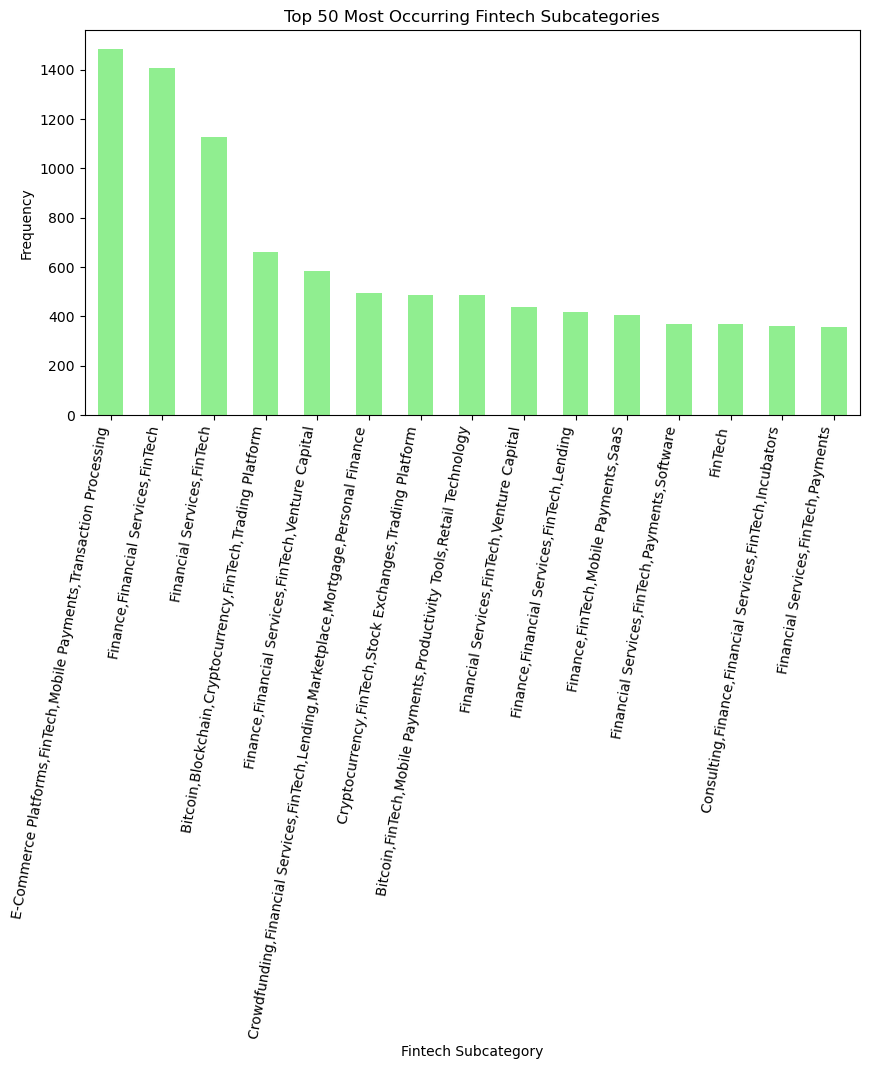

<Figure size 640x480 with 0 Axes>

In [92]:
# Plotting the top 50 fintech subcategories
plt.figure(figsize=(10,5))  # Adjust the figure size as needed
top_subcategories.plot(kind='bar', color= 'lightgreen')
plt.title('Top 50 Most Occurring Fintech Subcategories')
plt.xlabel('Fintech Subcategory')
plt.ylabel('Frequency')
plt.xticks(rotation=80, ha='right')  # Rotate subcategory names for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
plt.savefig('top50subcategories.png')

In [93]:
top_categorylist = fintechs['category_groups_list'].value_counts().head(20)

In [94]:
# Ensure only successful fintechs are included in our country distribution analysis
fintechs_succesful = fintechs[fintechs['status'].isin(['acquired', 'open'])]

In [95]:
success_category = fintechs_succesful['category_groups_list'].value_counts(ascending=False).head(20)

In [96]:
num_bars = len(success_category)

In [97]:
fig_width = max(num_bars * 0.5, 6)  # Ensure a minimum width of 6 inches
fig_height = max(num_bars * 0.3, 4)  # Ensure a minimum height of 4 inches


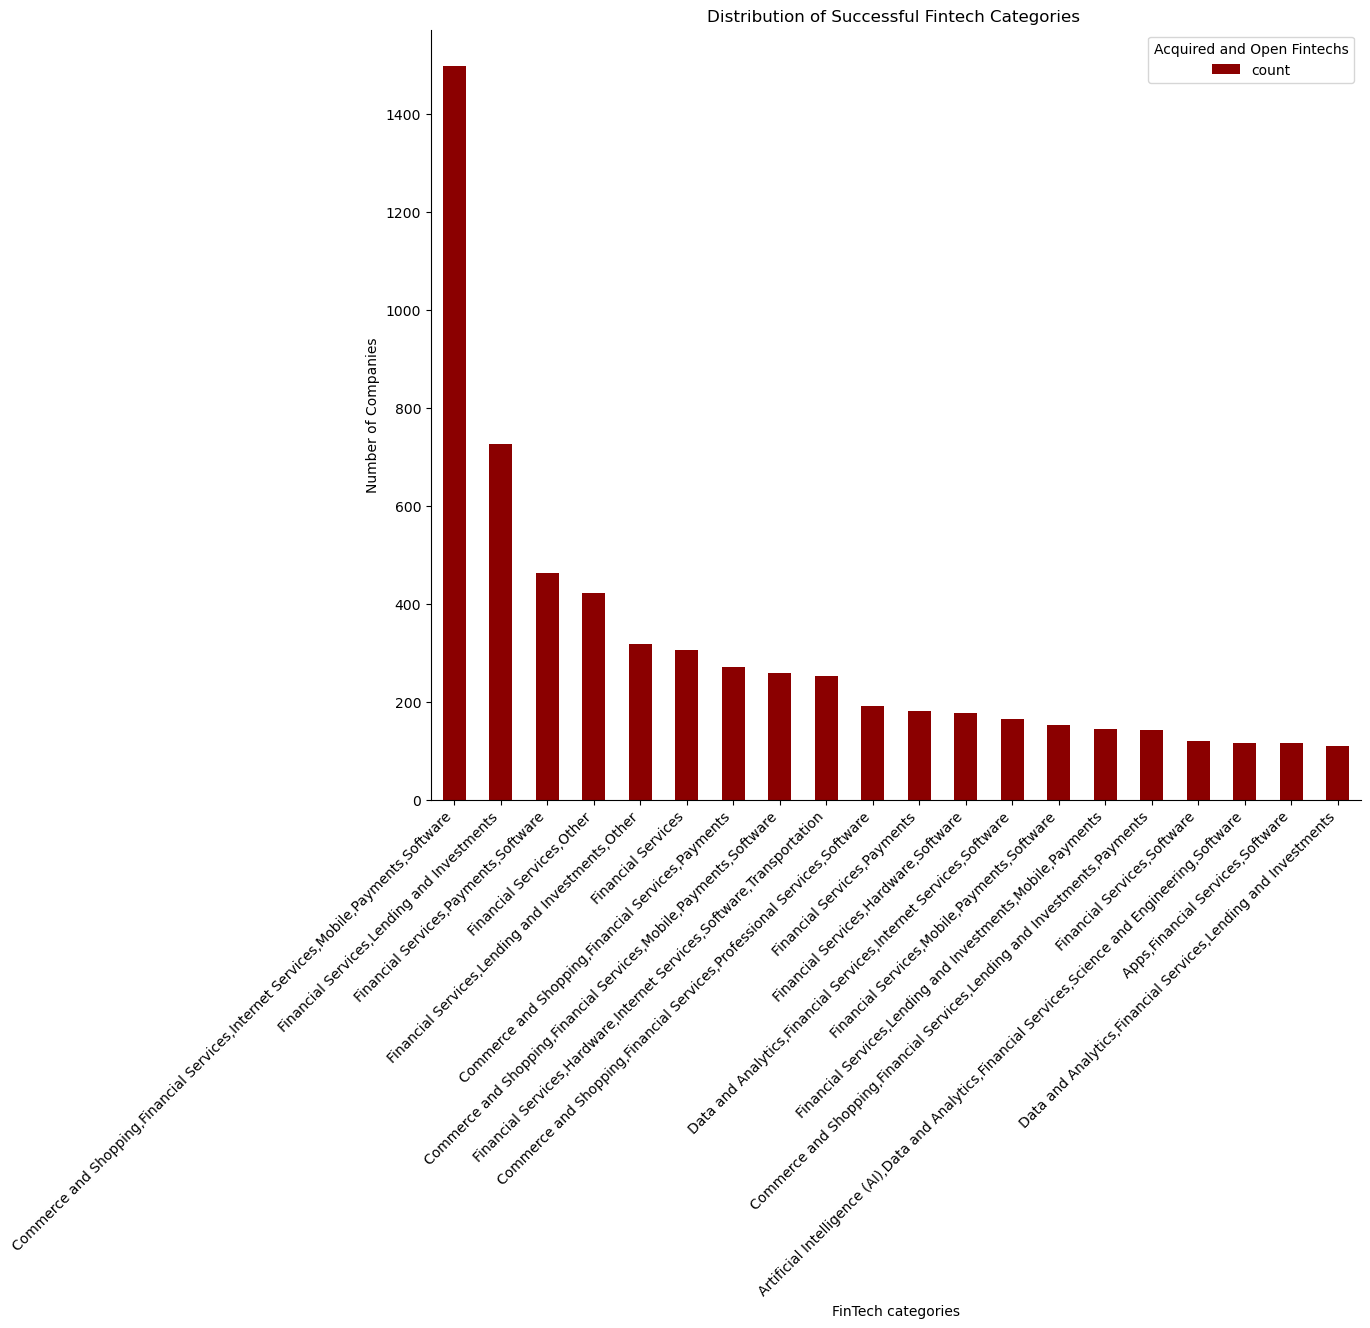

<Figure size 640x480 with 0 Axes>

In [98]:
# Plot
plt.figure(figsize=(12,10))
success_category.plot(kind='bar', stacked=True, color ='darkred')
plt.title('Distribution of Successful Fintech Categories ')
plt.xlabel('FinTech categories')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Acquired and Open Fintechs')
sns.despine()
plt.show()
plt.savefig('distributionfintechs.png')

In [99]:
country_counts = fintechs_succesful['country_code'].value_counts(ascending= False).head(20)

In [100]:
np.random.seed(42)  # Seed for reproducibility
colors = np.random.rand(len(country_counts), 3)  # Generate as many colors as there are countries


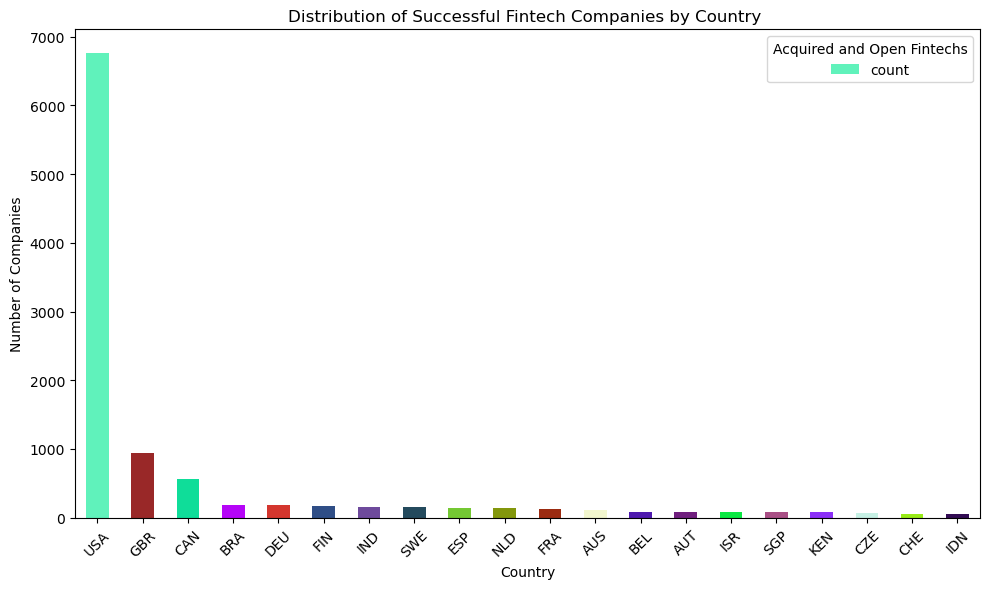

<Figure size 640x480 with 0 Axes>

In [101]:
# Plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', stacked=True, color =colors)
plt.title('Distribution of Successful Fintech Companies by Country ')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.legend(title='Acquired and Open Fintechs')
plt.tight_layout()
plt.show()
plt.savefig('distributionfintechs_country.png')

In [102]:
region = fintechs_succesful['region'].value_counts(ascending= False).head(20)

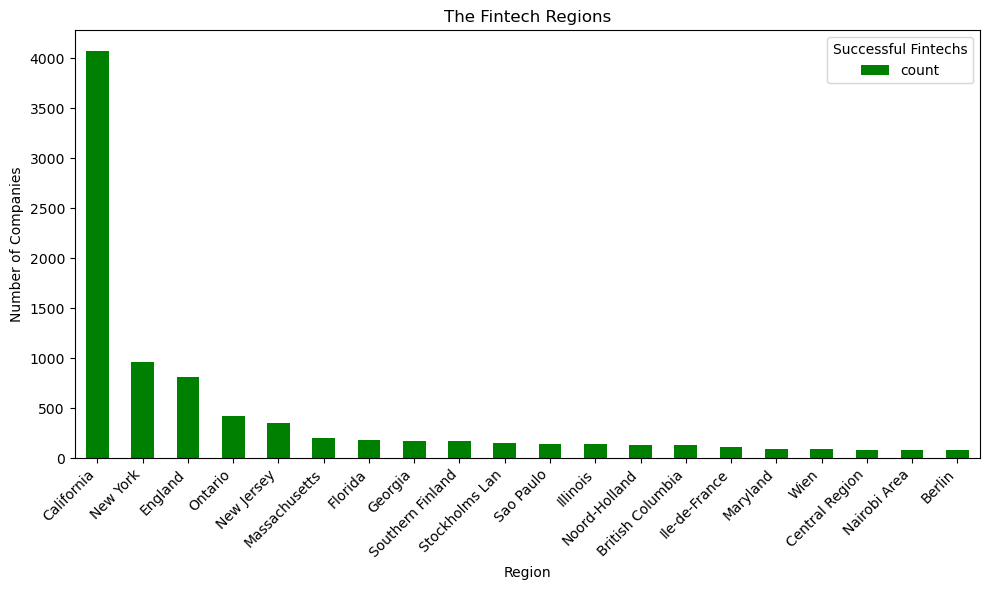

<Figure size 640x480 with 0 Axes>

In [103]:
# Plot
plt.figure(figsize=(10, 6))
region.plot(kind='bar', stacked=True, color ='green')
plt.title('The Fintech Regions')
plt.xlabel('Region')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Successful Fintechs')
plt.tight_layout()
plt.show()
plt.savefig('fintech_region.png')

In [104]:
cities = fintechs_succesful['city'].value_counts(ascending=False).head(20)

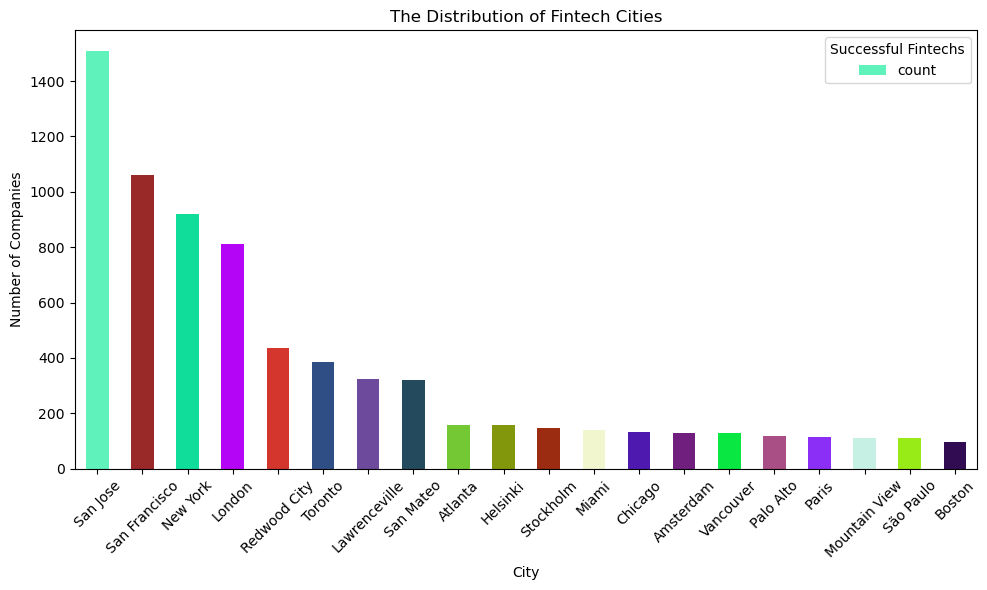

<Figure size 640x480 with 0 Axes>

In [105]:
# Plot
plt.figure(figsize=(10, 6))
cities.plot(kind='bar', stacked=True, color =colors)
plt.title('The Distribution of Fintech Cities')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.legend(title='Successful Fintechs')
plt.tight_layout()
plt.show()
plt.savefig('fintech_cities.png')

In [106]:
fintechs_clean.head(10)

,uuid,country_code,state_code,region,city,status,category_list,category_groups_list,num_funding_rounds,total_funding_usd,...,last_funding_on,closed_on,employee_count,num_exits,acquired_on,went_public_on,investment_type,investor_count,work_experience,year_founded
12067,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,6.0,2004.0
12068,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,5.0,2004.0
12069,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,18.0,2004.0
12070,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,NaN,2004.0
12071,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,NaN,2004.0
12072,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,NaN,2004.0
12073,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,NaN,2004.0
12074,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,16.0,2004.0
12075,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,3.0,2004.0
12076,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,2007-12-01,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,NaN,2004.0


In [107]:
fintechs_clean['avg_amount_raised'] = fintechs_clean['total_funding_usd'] / fintechs_clean['num_funding_rounds']

/tmp/ipykernel_1597/1147794936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fintechs_clean['avg_amount_raised'] = fintechs_clean['total_funding_usd'] / fintechs_clean['num_funding_rounds']


In [108]:
fintechs_clean.head(5)

,uuid,country_code,state_code,region,city,status,category_list,category_groups_list,num_funding_rounds,total_funding_usd,...,closed_on,employee_count,num_exits,acquired_on,went_public_on,investment_type,investor_count,work_experience,year_founded,avg_amount_raised
12067,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,6.0,2004.0,27500000.0
12068,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,5.0,2004.0,27500000.0
12069,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,18.0,2004.0,27500000.0
12070,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,NaN,2004.0,27500000.0
12071,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,101-250,NaN,2020-03-30,NaN,series_a,2.0,NaN,2004.0,27500000.0


In [109]:
from datetime import datetime

In [110]:
fintechs_clean['acquired_on'] = pd.to_datetime(fintechs_clean['acquired_on'])

/tmp/ipykernel_1597/3305699369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fintechs_clean['acquired_on'] = pd.to_datetime(fintechs_clean['acquired_on'])


In [111]:
fintechs_clean['acquistion_year'] = fintechs_clean['acquired_on'].dt.year.astype(float)


/tmp/ipykernel_1597/3704627248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fintechs_clean['acquistion_year'] = fintechs_clean['acquired_on'].dt.year.astype(float)


In [112]:
fintechs_clean['went_public_on'] = pd.to_datetime(fintechs_clean['went_public_on'])

/tmp/ipykernel_1597/936814822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fintechs_clean['went_public_on'] = pd.to_datetime(fintechs_clean['went_public_on'])


In [113]:
fintechs_clean['ipo_year'] = fintechs_clean['went_public_on'].dt.year.astype(float)

/tmp/ipykernel_1597/225099773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fintechs_clean['ipo_year'] = fintechs_clean['went_public_on'].dt.year.astype(float)


In [114]:
fintechs_clean.head(5)

,uuid,country_code,state_code,region,city,status,category_list,category_groups_list,num_funding_rounds,total_funding_usd,...,num_exits,acquired_on,went_public_on,investment_type,investor_count,work_experience,year_founded,avg_amount_raised,acquistion_year,ipo_year
12067,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,2020-03-30,NaT,series_a,2.0,6.0,2004.0,27500000.0,2020.0,NaN
12068,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,2020-03-30,NaT,series_a,2.0,5.0,2004.0,27500000.0,2020.0,NaN
12069,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,2020-03-30,NaT,series_a,2.0,18.0,2004.0,27500000.0,2020.0,NaN
12070,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,2020-03-30,NaT,series_a,2.0,NaN,2004.0,27500000.0,2020.0,NaN
12071,d0647cec-acb3-9a23-bc4f-d3fad90ecb4e,USA,FL,Florida,Miami,acquired,"Artificial Intelligence (AI),Banking,Big Data,...","Artificial Intelligence (AI),Data and Analytic...",2.0,55000000.0,...,NaN,2020-03-30,NaT,series_a,2.0,NaN,2004.0,27500000.0,2020.0,NaN


In [115]:
fintechs_clean['success_age'] = np.where(
    fintechs_clean['ipo_year'].notna(),
    fintechs_clean['ipo_year'] - fintechs_clean['year_founded'],
    fintechs_clean['acquistion_year'] - fintechs_clean['year_founded']
)

/tmp/ipykernel_1597/3090101505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fintechs_clean['success_age'] = np.where(


In [116]:
# If the year foundation is null, while ipo_year/ acquisition_year is not null, successs age is negative. Thus, we want to show only instances with complete data information.
fintechs_clean = fintechs_clean[fintechs_clean['success_age'] >= 0]

In [117]:
min_success_year = fintechs_clean.groupby('category_groups_list')['success_age'].min().reset_index()

In [118]:
sorted_categories = min_success_year.sort_values(by='success_age', ascending=True)


In [119]:
top_10_fintech_cat= sorted_categories.head(10)
pd.set_option('display.max_colwidth', None)  # Set to None to display full content of each cell
pd.set_option('display.max_rows', None) 

In [120]:
top_10_fintech_cat

,category_groups_list,success_age
67,"Apps,Financial Services,Lending and Investments,Mobile,Payments,Professional Services,Software",0.0
409,"Financial Services,Lending and Investments",0.0
37,"Apps,Commerce and Shopping,Financial Services,Information Technology,Software,Travel and Tourism",0.0
250,"Consumer Electronics,Data and Analytics,Financial Services,Hardware,Mobile,Payments,Software",0.0
162,"Blockchain and Cryptocurrency,Financial Services,Lending and Investments,Payments,Software",0.0
377,"Financial Services,Information Technology,Payments",0.0
421,"Financial Services,Lending and Investments,Payments",0.0
453,"Financial Services,Payments",0.0
147,"Blockchain and Cryptocurrency,Financial Services,Information Technology,Other",0.0
224,"Commerce and Shopping,Financial Services,Mobile,Payments,Software",0.0


In [121]:
region_success_age = fintechs_clean.groupby('region')['success_age'].min().reset_index()

In [122]:
region_success_age = region_success_age.sort_values(by='success_age', ascending= True)

In [123]:
top_15_regions = region_success_age.head(15)

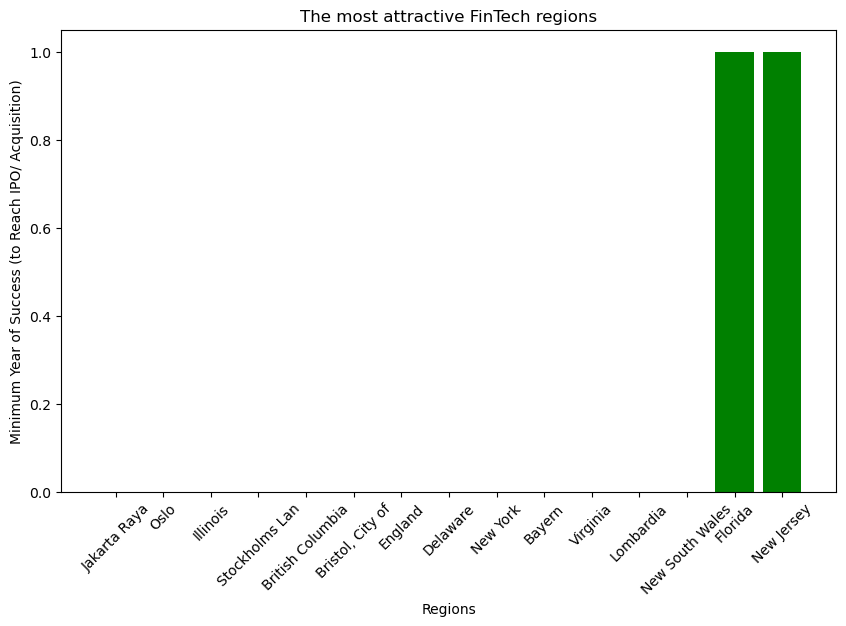

<Figure size 640x480 with 0 Axes>

In [124]:
plt.figure(figsize=(10,6))
plt.bar(top_15_regions['region'], top_15_regions['success_age'],color = 'green')
plt.xlabel('Regions')
plt.ylabel('Minimum Year of Success (to Reach IPO/ Acquisition)')
plt.title('The most attractive FinTech regions')
plt.xticks(rotation=45)
plt.show()
plt.savefig('fintech_regions.png')

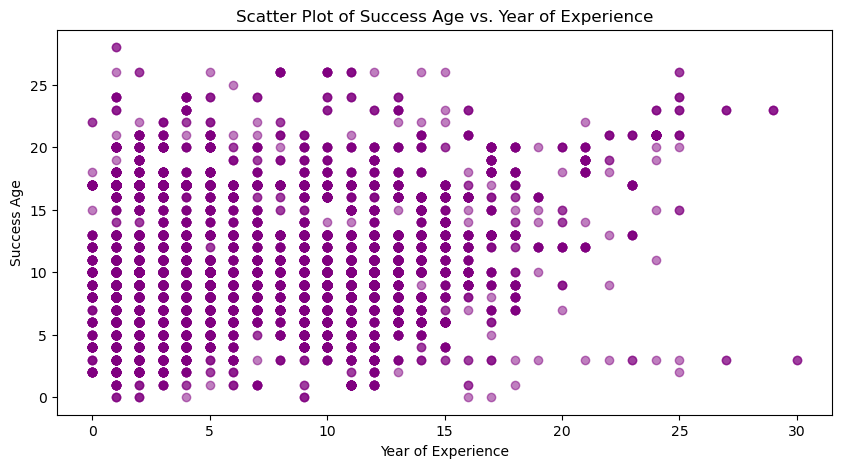

In [125]:
plt.figure(figsize=(10, 5))
plt.scatter(fintechs_clean['work_experience'], fintechs_clean['success_age'], color='purple', alpha=0.5)
plt.title('Scatter Plot of Success Age vs. Year of Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Success Age')
plt.grid(False)
plt.show()

In [126]:
fintech_cat_avg_fund = fintechs_clean.groupby('category_list')['avg_amount_raised'].max().reset_index()

In [127]:
fintech_cat_avg_fund = fintech_cat_avg_fund.sort_values(by= 'avg_amount_raised',ascending=False)

In [128]:
top_10_category_fund= fintech_cat_avg_fund.head(15)

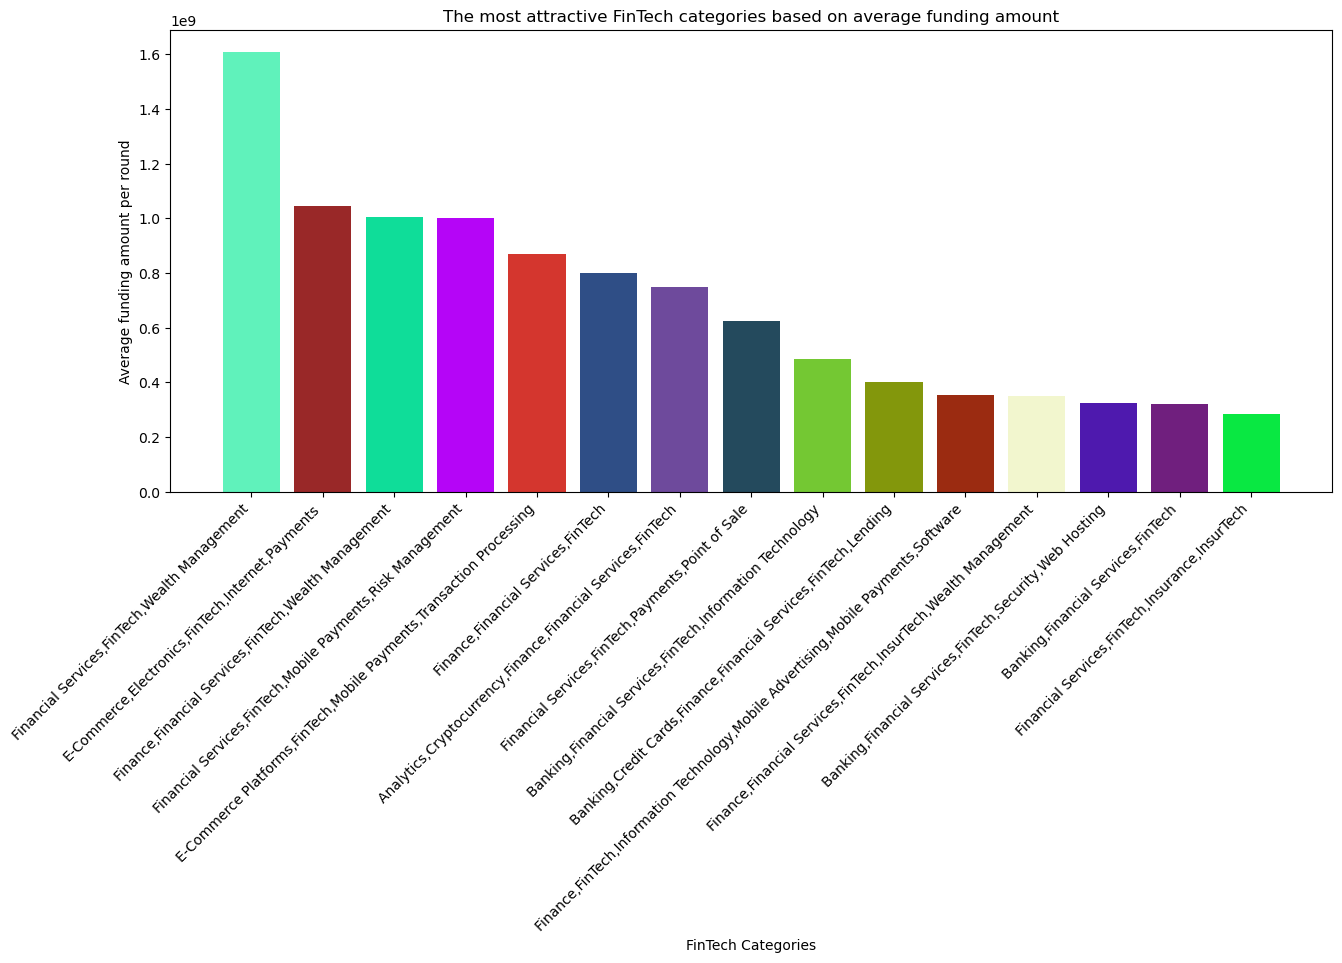

<Figure size 640x480 with 0 Axes>

In [129]:
plt.figure(figsize=(15,6))
plt.bar(top_10_category_fund['category_list'], top_10_category_fund['avg_amount_raised'],color = colors)
plt.xlabel('FinTech Categories')
plt.ylabel(('Average funding amount per round'))
plt.title('The most attractive FinTech categories based on average funding amount')
plt.xticks(rotation=45,ha='right')
plt.show()
plt.savefig('fintechs_avg_funds.png')

In [130]:
# Split the DataFrame based on the condition
post_2018 = fintechs_clean['year_founded'] >= 2018.0


In [131]:
pre_2008 = fintechs_clean['year_founded'] <=2008.0

In [132]:
betw_2008_2018 = [(fintechs_clean['year_founded'] >= 2008.0) & fintechs_clean['year_founded'] <2018.0]


In [133]:
# Define the conditions
conditions = [ (fintechs_clean['year_founded'] <2008.0),

    (fintechs_clean['year_founded'] >= 2008.0) & (fintechs_clean['year_founded'] <= 2018.0),
    (fintechs_clean['year_founded'] > 2018.0)
]

In [134]:
# Define the values to assign for each condition
values = [ 'pre_2008', 'between_2008_and_2018', 'post_2018']

In [135]:
# Create a new column based on the conditions and values
fintechs_clean['period'] = np.select(conditions, values)

In [136]:
# Calculate mean success_age for each period
mean_success_age_by_period = fintechs_clean.groupby('period')['success_age'].mean()


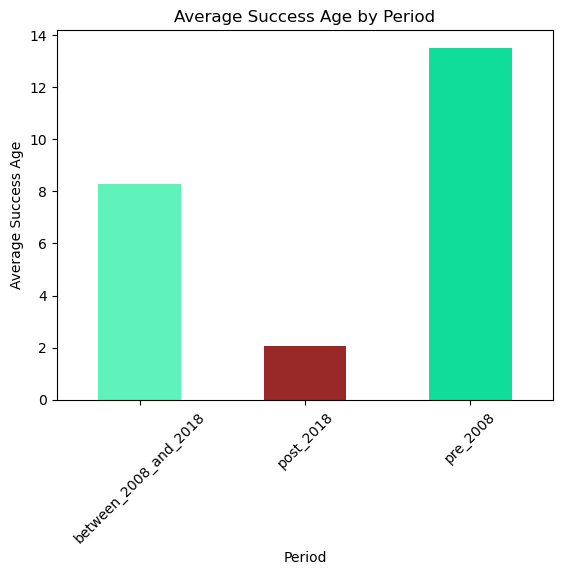

<Figure size 640x480 with 0 Axes>

In [137]:
# Plotting
mean_success_age_by_period.plot(kind='bar', color= colors)
plt.title('Average Success Age by Period')
plt.xlabel('Period')
plt.ylabel('Average Success Age')
plt.xticks(rotation=45)  
plt.show()
plt.savefig('success_by_period.png')

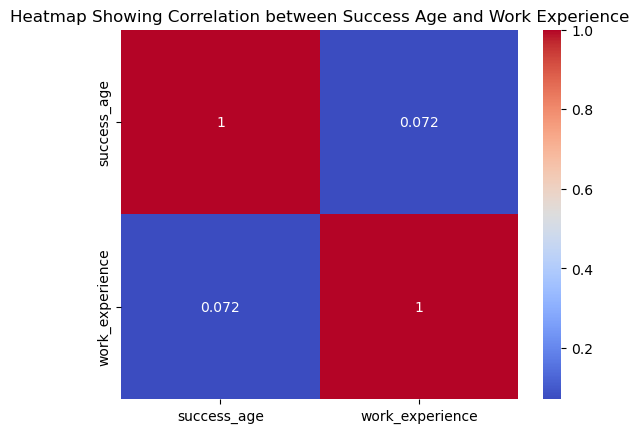

<Figure size 640x480 with 0 Axes>

In [138]:
corr = fintechs_clean[['success_age', 'work_experience']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Showing Correlation between Success Age and Work Experience')
plt.show()
plt.savefig('heatmap_success_workexperience.png')

### The correlation between features work experience and success age is relatively low. The column work experience show the number of years an employee, CEO, founders spent time in company. Unfortunately, we do not posses data about their previous work experience. The most precise measure of competence and know-how of founders and employees is sum of their work experience in previous and present workplaces.

## Binary enconding for output variable

In [141]:
mapping= {'ipo':1, 'acquired':1, 'operating':0, 'closed':0, np.nan: 0}

In [142]:
fintechs_clean['binary_status']= fintechs_clean['status'].map(mapping)

In [143]:
fintechs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17337 entries, 12067 to 2136594
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uuid                  17337 non-null  object        
 1   country_code          17310 non-null  object        
 2   state_code            13305 non-null  object        
 3   region                17310 non-null  object        
 4   city                  17310 non-null  object        
 5   status                17337 non-null  object        
 6   category_list         17337 non-null  object        
 7   category_groups_list  17337 non-null  object        
 8   num_funding_rounds    17337 non-null  float64       
 9   total_funding_usd     17337 non-null  float64       
 10  founded_on            17337 non-null  object        
 11  last_funding_on       17337 non-null  object        
 12  closed_on             828 non-null    object        
 13  employee_count 

# DATA CLEANING- final

## Fill NaN with 0 values

In [146]:
fintechs_clean[['investor_count', 'num_funding_rounds']] = fintechs_clean[['investor_count', 'num_funding_rounds']].fillna(0)

In [147]:
fintechs_clean['num_funding_rounds'] = fintechs_clean['num_funding_rounds'].fillna(0)

### Outliers - Interquartile Range (IQR) method

In [149]:
# IQR for total_funding_usd
Q1_funding = fintechs_clean['total_funding_usd'].quantile(0.25)
Q3_funding = fintechs_clean['total_funding_usd'].quantile(0.75)
IQR_funding = Q3_funding - Q1_funding

In [150]:
# IQR for avg_amount_raised
Q1_avg_amount = fintechs_clean['avg_amount_raised'].quantile(0.25)
Q3_avg_amount = fintechs_clean['avg_amount_raised'].quantile(0.75)
IQR_avg_amount = Q3_avg_amount - Q1_avg_amount

In [151]:
# Define masks to filter out outliers
mask_funding = (fintechs_clean['total_funding_usd'] >= (Q1_funding - 1.5 * IQR_funding)) & (fintechs_clean['total_funding_usd'] <= (Q3_funding + 1.5 * IQR_funding))
mask_avg_amount = (fintechs_clean['avg_amount_raised'] >= (Q1_avg_amount - 1.5 * IQR_avg_amount)) & (fintechs_clean['avg_amount_raised'] <= (Q3_avg_amount + 1.5 * IQR_avg_amount))


In [152]:
filter_fintech = fintechs_clean[mask_funding&mask_avg_amount]

In [153]:
filter_fintech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14497 entries, 12067 to 2136594
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uuid                  14497 non-null  object        
 1   country_code          14470 non-null  object        
 2   state_code            10713 non-null  object        
 3   region                14470 non-null  object        
 4   city                  14470 non-null  object        
 5   status                14497 non-null  object        
 6   category_list         14497 non-null  object        
 7   category_groups_list  14497 non-null  object        
 8   num_funding_rounds    14497 non-null  float64       
 9   total_funding_usd     14497 non-null  float64       
 10  founded_on            14497 non-null  object        
 11  last_funding_on       14497 non-null  object        
 12  closed_on             828 non-null    object        
 13  employee_count 

In [154]:
filter_fintech.describe()

,num_funding_rounds,total_funding_usd,num_exits,acquired_on,went_public_on,investor_count,work_experience,year_founded,avg_amount_raised,acquistion_year,ipo_year,success_age,binary_status
count,14497.000000,1.449700e+04,2379.000000,10563,5088,14497.000000,9127.000000,14497.000000,1.449700e+04,10563.000000,5088.000000,14497.000000,14497.000000
mean,7.557840,2.117163e+08,4.802018,2019-07-24 17:12:39.670547968,2018-10-25 04:20:05.660377344,3.391736,7.384573,2009.084362,2.179001e+07,2019.071571,2018.213836,9.622129,0.846796
min,1.000000,0.000000e+00,1.000000,2001-05-01 00:00:00,1999-06-29 00:00:00,0.000000,0.000000,1991.000000,0.000000e+00,2001.000000,1999.000000,0.000000,0.000000
25%,4.000000,1.562000e+07,1.000000,2017-10-17 00:00:00,2015-11-19 00:00:00,1.000000,3.000000,2006.000000,3.771107e+06,2017.000000,2015.000000,7.000000,1.000000
50%,7.000000,7.415000e+07,2.000000,2020-05-19 00:00:00,2019-12-11 00:00:00,3.000000,7.000000,2010.000000,1.380600e+07,2020.000000,2019.000000,9.000000,1.000000
75%,10.000000,3.150000e+08,4.000000,2022-01-27 00:00:00,2021-06-28 00:00:00,5.000000,11.000000,2012.000000,3.534067e+07,2022.000000,2021.000000,11.000000,1.000000
max,19.000000,1.346250e+09,146.000000,2024-01-22 00:00:00,2023-09-22 00:00:00,26.000000,29.000000,2021.000000,1.405000e+08,2024.000000,2023.000000,29.000000,1.000000
std,4.409672,2.780903e+08,8.976133,NaN,NaN,3.292224,5.005784,4.542218,2.477465e+07,3.320760,3.704787,4.334729,0.360197


#### We realize the most common foundation year for fintechs is 2008. Due to the World Economic Crises and its consequences to the public confidence in the traditional bank system, foundation FinTech startups is the answer to market demand. 

In [156]:
# Step 1: Split the 'category_groups_list' by the delimiter (e.g., comma) and explode the DataFrame
split_categories = filter_fintech['category_groups_list'].str.split(',').explode()

In [157]:
# Step 2: Get unique values from the exploded view
unique_category_groups= split_categories.unique()

In [158]:
# Optionally, convert to a list for easier handling
unique_category_groups_list = unique_category_groups.tolist()

In [159]:
print(unique_category_groups_list)

['Artificial Intelligence (AI)', 'Data and Analytics', 'Financial Services', 'Lending and Investments', 'Science and Engineering', 'Software', 'Commerce and Shopping', 'Other', 'Payments', 'Internet Services', 'Privacy and Security', 'Professional Services', 'Mobile', 'Information Technology', 'Hardware', 'Transportation', 'Apps', 'Media and Entertainment', 'Blockchain and Cryptocurrency', 'Clothing and Apparel', 'Design', 'Food and Beverage', 'Travel and Tourism', 'Sales and Marketing', 'Real Estate', 'Biotechnology', 'Community and Lifestyle', 'Consumer Electronics', 'Platforms', 'Administrative Services', 'Social Impact', 'Content and Publishing', 'Consumer Goods', 'Natural Resources', 'Advertising', 'Health Care', 'Education', 'Music and Audio', 'Gaming', 'Sports', 'Messaging and Telecommunications', 'Government and Military', 'Energy', 'Sustainability', 'Events', 'Navigation and Mapping', 'Video']


### The wide variety of services these FinTech companies have offered through years confirm that FinTech service, in most cases, wasn't the core business but it was introduced as an answer to the market demand. 

In [161]:
fintechs_clean.columns

Index(['uuid', 'country_code', 'state_code', 'region', 'city', 'status',
       'category_list', 'category_groups_list', 'num_funding_rounds',
       'total_funding_usd', 'founded_on', 'last_funding_on', 'closed_on',
       'employee_count', 'num_exits', 'acquired_on', 'went_public_on',
       'investment_type', 'investor_count', 'work_experience', 'year_founded',
       'avg_amount_raised', 'acquistion_year', 'ipo_year', 'success_age',
       'period', 'binary_status'],
      dtype='object')

In [162]:
filter_fintech.drop(columns = ['ipo_year', 'acquistion_year', 'period', 'went_public_on', 'acquired_on', 'closed_on', 'last_funding_on'], inplace= True)

/tmp/ipykernel_1597/924844424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_fintech.drop(columns = ['ipo_year', 'acquistion_year', 'period', 'went_public_on', 'acquired_on', 'closed_on', 'last_funding_on'], inplace= True)


In [163]:
filter_fintech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14497 entries, 12067 to 2136594
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uuid                  14497 non-null  object 
 1   country_code          14470 non-null  object 
 2   state_code            10713 non-null  object 
 3   region                14470 non-null  object 
 4   city                  14470 non-null  object 
 5   status                14497 non-null  object 
 6   category_list         14497 non-null  object 
 7   category_groups_list  14497 non-null  object 
 8   num_funding_rounds    14497 non-null  float64
 9   total_funding_usd     14497 non-null  float64
 10  founded_on            14497 non-null  object 
 11  employee_count        14497 non-null  object 
 12  num_exits             2379 non-null   float64
 13  investment_type       13686 non-null  object 
 14  investor_count        14497 non-null  float64
 15  work_experience   

In [164]:
filter_fintech['num_exits'] = filter_fintech['num_exits'].fillna(0)

/tmp/ipykernel_1597/3612565828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_fintech['num_exits'] = filter_fintech['num_exits'].fillna(0)


In [165]:
filter_fintech = filter_fintech.drop(columns=['state_code','work_experience'])

In [166]:
filter_fintech=  filter_fintech.dropna()

In [167]:
filter_fintech.to_csv('fintechs.csv', index=False)